<a href="https://colab.research.google.com/github/Sonarajan04/NLP_projects/blob/main/NLP_twitter.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

In [2]:
df=pd.read_csv('/content/drive/MyDrive/datasets/twitter_validation.csv',names=['id','location','target','text'])
df.head(5)

,id,location,target,text
0,3364,Facebook,Irrelevant,I mentioned on Facebook that I was struggling ...
1,352,Amazon,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...
2,8312,Microsoft,Negative,@Microsoft Why do I pay for WORD when it funct...
3,4371,CS-GO,Negative,"CSGO matchmaking is so full of closet hacking,..."
4,4433,Google,Neutral,Now the President is slapping Americans in the...


In [3]:
df.isna().sum()

id          0
location    0
target      0
text        0
dtype: int64

In [4]:
df['target'].value_counts()

target
Neutral       285
Positive      277
Negative      266
Irrelevant    172
Name: count, dtype: int64

In [5]:
import seaborn as sns

<Axes: xlabel='target', ylabel='count'>

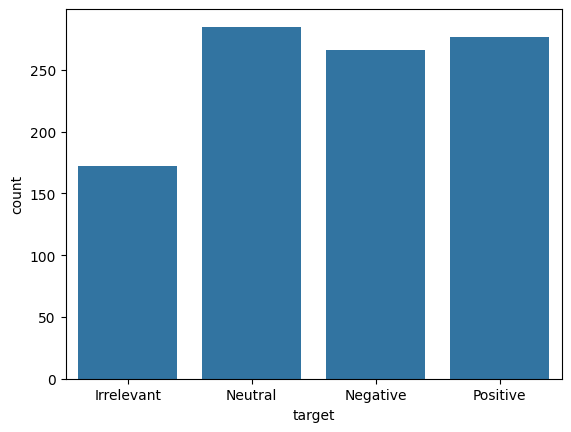

In [6]:
sns.countplot(x='target',data=df)

In [7]:
df.drop(['id','location'],axis=1,inplace=True)
df.head()

,target,text
0,Irrelevant,I mentioned on Facebook that I was struggling ...
1,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...
2,Negative,@Microsoft Why do I pay for WORD when it funct...
3,Negative,"CSGO matchmaking is so full of closet hacking,..."
4,Neutral,Now the President is slapping Americans in the...


In [8]:
#deleting irrelevent rows

In [9]:
df=df.loc[df['target']!='Irrelevant']
df.head()

,target,text
1,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...
2,Negative,@Microsoft Why do I pay for WORD when it funct...
3,Negative,"CSGO matchmaking is so full of closet hacking,..."
4,Neutral,Now the President is slapping Americans in the...
5,Negative,Hi @EAHelp I’ve had Madeleine McCann in my cel...


In [10]:
df.shape

(828, 2)

In [11]:
df['target'].unique()

array(['Neutral', 'Negative', 'Positive'], dtype=object)

In [12]:
df.reset_index(drop=True,inplace=True)

In [13]:
df.head(10)

,target,text
0,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...
1,Negative,@Microsoft Why do I pay for WORD when it funct...
2,Negative,"CSGO matchmaking is so full of closet hacking,..."
3,Neutral,Now the President is slapping Americans in the...
4,Negative,Hi @EAHelp I’ve had Madeleine McCann in my cel...
5,Positive,Thank you @EAMaddenNFL!! \n\nNew TE Austin Hoo...
6,Positive,"Rocket League, Sea of Thieves or Rainbow Six: ..."
7,Positive,my ass still knee-deep in Assassins Creed Odys...
8,Negative,FIX IT JESUS ! Please FIX IT ! What In the wor...
9,Positive,The professional dota 2 scene is fucking explo...


In [14]:
df['target']=df['target'].map({'Positive':1,'Negative':-1,'Neutral':0})

In [15]:
df['target'].value_counts()

target
 0    285
 1    277
-1    266
Name: count, dtype: int64

In [16]:
df.tail(5)

,target,text
823,-1,Please explain how this is possible! How can t...
824,1,Good on Sony. As much as I want to see the new...
825,1,Today sucked so it’s time to drink wine n play...
826,1,Bought a fraction of Microsoft today. Small wins.
827,0,Johnson & Johnson to stop selling talc baby po...


In [17]:
tweets=df.text
tweets.head(4)

0    BBC News - Amazon boss Jeff Bezos rejects clai...
1    @Microsoft Why do I pay for WORD when it funct...
2    CSGO matchmaking is so full of closet hacking,...
3    Now the President is slapping Americans in the...
Name: text, dtype: object

In [18]:
#removing the spcl charectors from text

In [19]:
tweets=tweets.str.replace('[^a-zA-Z0-9]+',' ')
tweets.head(4)

0    BBC News - Amazon boss Jeff Bezos rejects clai...
1    @Microsoft Why do I pay for WORD when it funct...
2    CSGO matchmaking is so full of closet hacking,...
3    Now the President is slapping Americans in the...
Name: text, dtype: object

In [20]:
#stemming,finding the rootword

In [21]:
from nltk.stem import SnowballStemmer
from nltk import TweetTokenizer
stemmer=SnowballStemmer('english')
tk=TweetTokenizer()

In [22]:
tweets=tweets.apply(lambda x:[stemmer.stem(token.lower()) for token in tk.tokenize(x)]).apply(lambda token:' '.join(token))
tweets.head(5)

0    bbc news - amazon boss jeff bezo reject claim ...
1    @microsoft whi do i pay for word when it funct...
2    csgo matchmak is so full of closet hack , it a...
3    now the presid is slap american in the face th...
4    hi @eahelp i ’ ve had madelein mccann in my ce...
Name: text, dtype: object

In [23]:
#removing stopwords

In [24]:
from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')
sw=stopwords.words('english')
print(sw)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [25]:
tweets=tweets.apply(lambda x:[token for token in tk.tokenize(x) if token not in sw]).apply(lambda token:' '.join(token))
tweets.head(5)

0    bbc news - amazon boss jeff bezo reject claim ...
1    @microsoft whi pay word function poor @samsung...
2     csgo matchmak full closet hack , truli aw game .
3    presid slap american face realli commit unlaw ...
4    hi @eahelp ’ madelein mccann cellar past 13 ye...
Name: text, dtype: object

In [26]:
from sklearn.feature_extraction.text import TfidfVectorizer
vector=TfidfVectorizer()
X=vector.fit_transform(tweets)
print(X)

  (0, 644)	0.24371149439523576
  (0, 422)	0.24371149439523576
  (0, 3598)	0.21193288837057733
  (0, 793)	0.11710011882947315
  (0, 975)	0.24371149439523576
  (0, 1107)	0.22964923721081565
  (0, 2030)	0.124059738467601
  (0, 233)	0.21193288837057733
  (0, 823)	0.16216158309067538
  (0, 766)	0.20026342771374978
  (0, 2856)	0.24371149439523576
  (0, 516)	0.24371149439523576
  (0, 1860)	0.22964923721081565
  (0, 584)	0.21193288837057733
  (0, 306)	0.1415930695027434
  (0, 2340)	0.3691755458992268
  (0, 484)	0.4592984744216313
  (1, 756)	0.4055823664694651
  (1, 2995)	0.4055823664694651
  (1, 2637)	0.3821800909185634
  (1, 1398)	0.4055823664694651
  (1, 3820)	0.36557591217188057
  (1, 2534)	0.3126902562590763
  (1, 3779)	0.26216072802580975
  (1, 2195)	0.24555654927912696
  :	:
  (825, 3512)	0.2560582225152134
  (825, 581)	0.22981061112100945
  (825, 968)	0.2315686698425631
  (825, 3501)	0.21750175079084832
  (825, 3343)	0.2904718522758868
  (825, 2600)	0.17148706662740873
  (826, 1372)	0.5

In [27]:
vector.get_feature_names_out()

array(['00', '00016', '02', ..., 'zyot3flen0', 'zysola', '𝐍𝐄𝐖𝐒𝐔𝐏𝐃𝐀𝐓𝐄𝐒'],
      dtype=object)

In [28]:
X.shape

(828, 3937)

In [29]:
y=df['target']
y.head(5)

0    0
1   -1
2   -1
3    0
4   -1
Name: target, dtype: int64

In [30]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=1,test_size=0.3)

In [31]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()
from sklearn.ensemble import AdaBoostClassifier
abc=AdaBoostClassifier()
from sklearn.svm import SVC
sv=SVC()

In [32]:
from sklearn.metrics import accuracy_score,classification_report

In [33]:
lst=[knn,abc,sv]
for i in lst:
  print('**********',i,'**********')
  i.fit(X_train,y_train)
  y_pred=i.predict(X_test)
  print(accuracy_score(y_test,y_pred))
  print(classification_report(y_test,y_pred))

********** KNeighborsClassifier() **********
0.4738955823293173
              precision    recall  f1-score   support

          -1       0.38      0.82      0.52        74
           0       0.62      0.37      0.47        91
           1       0.66      0.27      0.39        84

    accuracy                           0.47       249
   macro avg       0.55      0.49      0.46       249
weighted avg       0.56      0.47      0.46       249

********** AdaBoostClassifier() **********
0.46987951807228917
              precision    recall  f1-score   support

          -1       0.39      0.64      0.48        74
           0       0.60      0.51      0.55        91
           1       0.48      0.29      0.36        84

    accuracy                           0.47       249
   macro avg       0.49      0.48      0.46       249
weighted avg       0.49      0.47      0.46       249

********** SVC() **********
0.6305220883534136
              precision    recall  f1-score   support

         

In [34]:
#prediction

In [35]:
y_new=sv.predict(vector.transform(['bbc news amazon boss']))
y_new

array([0])